# SKILL DATASET

###### Data Cleaning and Preprocessing

Development           2406
Finance                366
Other                  301
Project Management      72
Design                  54
Name: Vertical_Category, dtype: int64

Software Consultants          59
Web Developers                44
IT Project Managers           40
UX/UI Designers               38
Python Developers             36
                              ..
dax functions                  1
C Programmers & Developers     1
materialdesignlite             1
AJAX Developers                1
excel dax                      1
Name: Related_Skill, Length: 1432, dtype: int64

Competitor_ID               0
Vertical_Category           0
Primary_Skill               0
Primary_Skill_CPC_USD     300
Primary_Skill_PPC         141
Related_Skill             803
Related_Skill_CPC_USD    1366
Related_Skill_PPC        1135
#_of_Jobs                   0
dtype: int64


Competitor_ID            0
Vertical_Category        0
Primary_Skill            0
Primary_Skill_CPC_USD    0
Primary_Skill_PPC        0
Related_Skill            0
Related_Skill_CPC_USD    0
Related_Skill_PPC        0
#_of_Jobs                0
dtype: int64

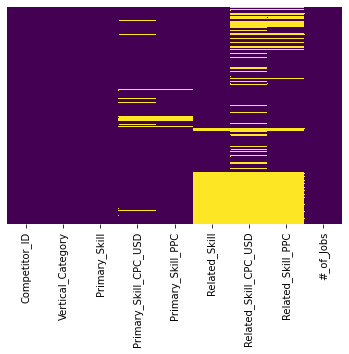

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
import pandas as pd
pd.get_option("display.max_columns", None)

skill_dataset = pd.read_csv("Skill_dataset.csv")

skill_dataset

skill_dataset.isnull().sum()

skill_dataset.describe()

skill_dataset.columns

# Renaming the columns to allow for better analysis

skill_dataset.rename(columns = {'Competitor ID':'Competitor_ID', 
                                'Vertical Category':'Vertical_Category',
                                'Primary Skill':'Primary_Skill',
                                 ' Primary Skill Avg. Search Volume (12 mo)':'Primary_Skill_Avg_SV_12',
                               'Primary Skill Avg. Search Volume (12 mo)':'Primary_Skill_Avg_SV_12',
                                'Primary Skill Avg. Search Volume (6 mo)':'Primary_Skill_Avg_SV_6',
                               'Primary Skill Avg. Search Volume (3 mo)':'Primary_Skill_Avg_SV_3',
                                'Primary Skill CPC/USD':'Primary_Skill_CPC_USD',
                               'Primary Skill PPC':'Primary_Skill_PPC',
                                'Primary Skill Keyword Difficulty':'Primary_Skill_Keyword_Difficulty',
                               'Related Skill':'Related_Skill',
                                'Related Skill Avg. Search Volume (12 mo)':'Related_Skill_Avg_SV_12',
                               'Primary Skill Avg. Search Volume (6 mo).1':'Primary_Skill_Avg_SV_6',
                               'Related Skill Avg. Search Volume (3 mo)':'Related_Skill_Avg_SV_3',
                               'Related Skill CPC/USD':'Related_Skill_CPC_USD',
                                'Related Skill PPC':'Related_Skill_PPC',
                               'Related Skill Keyword Difficulty':'Related_Skill_Keyword_Difficulty',
                               '# of Jobs':'#_of_Jobs'}, inplace = True)

# Filtering the dataset and identifing the columns needed for this analysis
df=skill_dataset[['Competitor_ID','Vertical_Category','Primary_Skill','Primary_Skill_CPC_USD','Primary_Skill_PPC',
             'Related_Skill','Related_Skill_CPC_USD','Related_Skill_PPC','#_of_Jobs']]


# A visual to Check for NA values
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

# checking for all seemingly categorical columns to identify the uniqueness of each columns

print(df.Vertical_Category.value_counts())
print('')
print(df.Related_Skill.value_counts())
print('')

# knowing the amount of NA values in each columns to decide how to treat them
print(df.isna().sum())



# Functions to fill in all missing data by using the mean of each cloumn and grouped by the 'vertic_category' column

def impute_value_Primary_Skill_CPC_USD(cols):
    Primary_Skill_CPC_USD = cols[0]
    Vertical_Category = cols[1]
    
    if pd.isnull(Primary_Skill_CPC_USD):
        if Vertical_Category == 'Development':
            return(df[df.Vertical_Category=='Development']['Primary_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Other':
            return(df[df.Vertical_Category=='Other']['Primary_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Finance':
            return(df[df.Vertical_Category=='Finance']['Primary_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Project Management':
            return(df[df.Vertical_Category=='Project Management']['Primary_Skill_CPC_USD'].mean())
        else:
            return(df[df.Vertical_Category=='Design']['Primary_Skill_CPC_USD'].mean())
    else:
        return(Primary_Skill_CPC_USD)
    

df['Primary_Skill_CPC_USD'] = df[['Primary_Skill_CPC_USD','Vertical_Category']].apply(impute_value_Primary_Skill_CPC_USD,axis=1)

def impute_value_Primary_Skill_PPC(cols):
    Primary_Skill_PPC = cols[0]
    Vertical_Category = cols[1]
    
    if pd.isnull(Primary_Skill_PPC):
        if Vertical_Category == 'Development':
            return(df[df.Vertical_Category=='Development']['Primary_Skill_PPC'].mean())
        if Vertical_Category == 'Other':
            return(df[df.Vertical_Category=='Other']['Primary_Skill_PPC'].mean())
        if Vertical_Category == 'Finance':
            return(df[df.Vertical_Category=='Finance']['Primary_Skill_PPC'].mean())
        if Vertical_Category == 'Project Management':
            return(df[df.Vertical_Category=='Project Management']['Primary_Skill_PPC'].mean())
        else:
            return(df[df.Vertical_Category=='Design']['Primary_Skill_PPC'].mean())
    else:
        return(Primary_Skill_PPC)
    

df['Primary_Skill_PPC'] = df[['Primary_Skill_PPC','Vertical_Category']].apply(impute_value_Primary_Skill_PPC,axis=1)

def impute_value_Related_Skill_CPC_USD(cols):
    Related_Skill_CPC_USD = cols[0]
    Vertical_Category = cols[1]
    
    if pd.isnull(Related_Skill_CPC_USD):
        if Vertical_Category == 'Development':
            return(df[df.Vertical_Category=='Development']['Related_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Other':
            return(df[df.Vertical_Category=='Other']['Related_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Finance':
            return(df[df.Vertical_Category=='Finance']['Related_Skill_CPC_USD'].mean())
        if Vertical_Category == 'Project Management':
            return(df[df.Vertical_Category=='Project Management']['Related_Skill_CPC_USD'].mean())
        else:
            return(df[df.Vertical_Category=='Design']['Related_Skill_CPC_USD'].mean())
    else:
        return(Related_Skill_CPC_USD)
    
    
df['Related_Skill_CPC_USD'] = df[['Related_Skill_CPC_USD','Vertical_Category']].apply(impute_value_Primary_Skill_PPC,axis=1)

def impute_value_Related_Skill_PPC(cols):
    Related_Skill_PPC = cols[0]
    Vertical_Category = cols[1]
    
    if pd.isnull(Related_Skill_PPC):
        if Vertical_Category == 'Development':
            return(df[df.Vertical_Category=='Development']['Related_Skill_PPC'].mean())
        if Vertical_Category == 'Other':
            return(df[df.Vertical_Category=='Other']['Related_Skill_PPC'].mean())
        if Vertical_Category == 'Finance':
            return(df[df.Vertical_Category=='Finance']['Related_Skill_PPC'].mean())
        if Vertical_Category == 'Project Management':
            return(df[df.Vertical_Category=='Project Management']['Related_Skill_PPC'].mean())
        else:
            return(df[df.Vertical_Category=='Design']['Related_Skill_PPC'].mean())
    else:
        return(Related_Skill_PPC)
    
    
df['Related_Skill_PPC'] = df[['Related_Skill_PPC','Vertical_Category']].apply(impute_value_Primary_Skill_PPC,axis=1)

df.isna().sum()

# Filling the null values in the 'Related_Skill' column wiht 'Not Identified' value instead of dropping them
df.Related_Skill.fillna('Not Identified',inplace=True)



# Creating 2 different Dataframe from the parent dataframe , df_vertics and df_related
df_vertics = df[['Competitor_ID', 'Vertical_Category', 'Primary_Skill','Primary_Skill_CPC_USD', 'Primary_Skill_PPC','#_of_Jobs']]
df_related =df[['Competitor_ID', 'Vertical_Category', 'Primary_Skill','Related_Skill','Related_Skill_CPC_USD', 'Related_Skill_PPC', '#_of_Jobs']]


#checking for NA or missing values to justify the cleaning
df.isna().sum()

### What are the most lucrative verticals?
+ The most lucrative vertical category was found to be Development based on it having the highest value in 'Primary skill CPC/USD' in comparism to the other vertical category
+ A table is provide with value details below. The table has been sorted in a descending order i.e from highest to lowest based on the 'Primary skill CPC/USD'
+ Followed ny a simply bar plot for easy visualization how how all the vertical category compares to eachother based on its 'Primary skill CPC/USD'


In [213]:
# Creation of table 
df_vertics.groupby('Vertical_Category').max().reset_index().sort_values('Primary_Skill_CPC_USD', ascending=False)

Vertical_Category Competitor_ID         Primary_Skill  \
1         Development             F            zTemplates   
3               Other             E                  yaml   
4  Project Management             C  Web Project Managers   
0              Design             D         Web Designers   
2             Finance             B       Venture Capital   

   Primary_Skill_CPC_USD  Primary_Skill_PPC  #_of_Jobs  
1                 274.16              100.0     4997.0  
3                  91.82               82.0     4989.0  
4                  50.81               71.0     4966.0  
0                  29.95               51.0     4929.0  
2                  15.89               37.0     4991.0

<AxesSubplot:xlabel='Vertical_Category', ylabel='Primary_Skill_CPC_USD'>

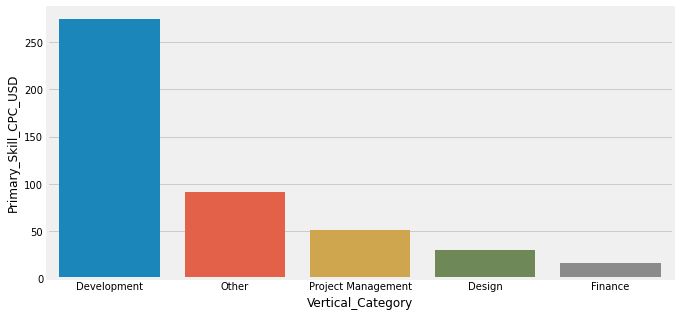

In [214]:
# creation of bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=question1['Vertical_Category'], y=question1['Primary_Skill_CPC_USD'], data=question1)

### What primary  skills seem to be the lowest hanging fruit and why?
+ Just to mention a few (top 5 lowest), based on the Primary_Skill_CPC_USD are sublime text, Koa, Shell, Adobe Flex, Puppeteer, Vim and others with CFWheels being the lowest over all with a Primary_Skill_CPC_USD of 0.13
+ Coming about this was by reseting the dataset by grouping the data by the primary skill and sorting the frame by the primary_skill_cpc_usd in a desending order
+ A table as been provided to display the top 20 lowest hanging Primary Skills based on their 'Primary_Skill_CPC_USD'
+ Followed after is the bar plot visuals

In [215]:
# creating the table described above
df_vertics.groupby('Primary_Skill').min().reset_index().sort_values('Primary_Skill_CPC_USD', ascending=True).head(20)

Primary_Skill Competitor_ID Vertical_Category  Primary_Skill_CPC_USD  \
143       CFWheels             F       Development                   0.13   
519   sublime text             E             Other                   0.13   
285            Koa             F       Development                   0.19   
384          Shell             F       Development                   0.22   
37      Adobe Flex             F       Development                   0.26   
335      Puppeteer             F       Development                   0.29   
523            vim             E             Other                   0.29   
109        Banshee             F       Development                   0.30   
160         Celery             F       Development                   0.31   
181       Cucumber             F       Development                   0.32   
269            JNI             F       Development                   0.35   
39           Agavi             F       Development                   0.37   
86           Apple             F       Development                   0.38   
456            XNA             F       Development                   0.41   
197         Delphi             F       Development                   0.42   
338        PyCharm             F       Development                   0.44   
154       Capybara             F       Development                   0.46   
121     BlackBerry             F       Development                   0.47   
362           Rust             F       Development                   0.49   
478  abbreviations             E             Other                   0.50   

     Primary_Skill_PPC  #_of_Jobs  
143               63.0     4530.0  
519                0.0     3470.0  
285                6.0      279.0  
384                5.0     2025.0  
37                 0.0      609.0  
335                0.0      866.0  
523               69.0     4168.0  
109                1.0     2667.0  
160               71.0     2380.0  
181               60.0     3174.0  
269                0.0     2523.0  
39                79.0     4861.0  
86                92.0      591.0  
456                3.0     2808.0  
197                5.0      651.0  
338                1.0      201.0  
154                4.0     3336.0  
121               71.0     2718.0  
362                2.0     1872.0  
478                0.0     2960.0

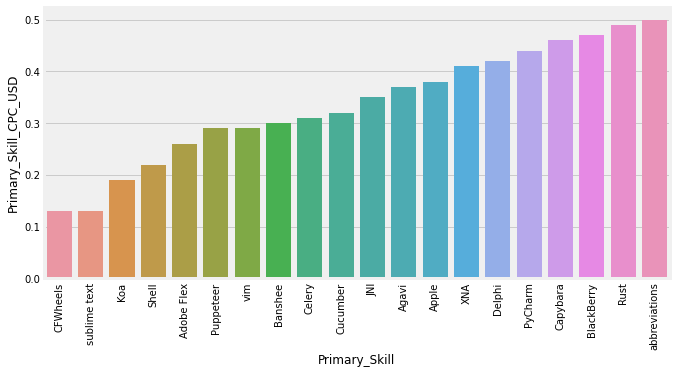

In [216]:
# creation of bar plot
question2 = df_vertics.groupby('Primary_Skill').min().reset_index().sort_values('Primary_Skill_CPC_USD', ascending=True).head(20)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=question2['Primary_Skill'], y=question2['Primary_Skill_CPC_USD'], data=question1)
plt.xticks(rotation=90);

### What are the most commonly related skills to primary skills by verticals?

*Answer:  The most commonly related skills to primary skills by verticals can be seen in the 'most_common_related_primary_skill' table privided  i.e Table in the next cell*

To carry out this assessment, a step by step guide is described to enable easy understanding of how the answer came about

+ **step 1:** 
A cross tabluation of related skills vs primary skills pivoting it around the vertical category column and decided to flatten it to a regular dataframe

+ **step 2:**
Ordering the table based on the column 'No_of_time_occuring_together' in a descending order to find out the once with maximum counts
*Maximun counts meaning how many times this skills where mention togther at the same time

+ **step 3:**
After finding out that the related skills had maximum counts of 4 (i.e this two skills were placed together 4 times) an issue was detected, which had to do with the 'Related Skill' column. It had a lot of 'Not Identified Skills' (a value used to replace null values), so therefore using the frame with 'Not_Identified' value and score of 4 was biased and meaningless

+ **step 4:**
A filtering was then carried out to remove all 'Not identified skill' value from the frame and ended up with a frame of maximum value 2. which would be more meaningfull to answering this question
    
*Answer:  The most commonly related skills to primary skills by verticals can be seen in the 'most_common_related_primary_skill' table below*

In [217]:
# df.groupby(['Vertical_Category','Primary_Skill','Related_Skill']).count().reset_index().sort_values('Competitor_ID', ascending=False)
# pr_.groupby('Vertical_Category').count()
pd.get_option("display.max_columns", None)
top_Primary_Related_Skill = pd.DataFrame(pd.crosstab(df.Vertical_Category,[df.Primary_Skill,df.Related_Skill])
                                         .sum().sort_values(ascending=False).reset_index())
top_Primary_Related_Skill.columns = ['Primary_Skill', 'Relation_Skill', 'No_of_time_occuring_together']


df.groupby(['Vertical_Category','Primary_Skill','Related_Skill']).count().reset_index().sort_values('Competitor_ID', ascending=False)


top_Primary_Related_Skill

without_not_identied=top_Primary_Related_Skill[top_Primary_Related_Skill.Relation_Skill !='Not Identified']
# filter_not_identified = _4th[_4th.Relation_Skill !='Not Identified']

# filter_not_identified
most_common_related_primary_skill = without_not_identied[without_not_identied.No_of_time_occuring_together==2]

most_common_related_primary_skill

Primary_Skill           Relation_Skill  \
103                   FinTech            SME financing   
109   React Native Developers       Android Developers   
110           Game Developers         Unity Developers   
111          HTML5 Developers            Web Designers   
112          HTML5 Developers     WordPress Developers   
113   React Native Developers       Flutter Developers   
114        Magento Developers       Shopify Developers   
115          Scala Developers        Kotlin Developers   
116     Mobile App Developers       Android Developers   
117     Mobile App Developers  React Native Developers   
118     Mobile App Developers           iOS Developers   
119  Ruby on Rails Developers        Django Developers   
120           Ruby Developers        Django Developers   
121   React Native Developers           iOS Developers   
122        Shopify Developers       Magento Developers   
153              3D Designers        Product Designers   
176            C++ Developers        Python Developers   

     No_of_time_occuring_together  
103                             2  
109                             2  
110                             2  
111                             2  
112                             2  
113                             2  
114                             2  
115                             2  
116                             2  
117                             2  
118                             2  
119                             2  
120                             2  
121                             2  
122                             2  
153                             2  
176                             2

### How might you go about determining which related skills are strongest to the primary skills?

+ Going about this would be to reset the dataframe by grouping by both primary and related skill column and using the a sum aggregate on '#_of_Jobs'
+ A table has been derived below to view the top 20 strongest related skill to the primary skills based of on their number of jobs
+ Followd along is a visualization taking the form of a bar plot



In [218]:
# Table generation

top_activities = df.groupby(by=['Primary_Skill', 'Related_Skill'])['#_of_Jobs'].sum().sort_values(ascending=True).head(20).reset_index()

top_activities=top_activities[top_activities.Related_Skill !='Not Identified']
top_activities['combined_skill']= top_activities.Primary_Skill +' vs '+top_activities.Related_Skill
top_activities = top_activities[['combined_skill','#_of_Jobs']]
top_activities

combined_skill  #_of_Jobs
0       Blockchain Developers vs Software Consultants       13.0
3   Microsoft Access Consultants vs Filemaker Pro ...       24.0
4               Pytorch Developers vs Data Scientists       25.0
5         Software Project Managers vs Product Owners       26.0
6                        Python vs python data access       26.0
7                     Venture Capital vs Real options       28.0
8           Business Strategists vs Business Analysts       31.0
9                     Web Designers vs Logo Designers       33.0
11               Rust Developers vs Godot Freelancers       36.0
12        Javascript Developers vs Node.js Developers       39.0
13                    C++ Developers vs C# Developers       40.0
14            Laravel Developers vs Mobile Developers       43.0
15               Private Equity vs Private Placements       44.0
16           Investment Management vs Risk Management       45.0
17           Microsoft Technology vs entity framework       46.0
18                       CTOs vs Business Strategists       50.0
19                   C# Developers vs .NET Developers       55.0

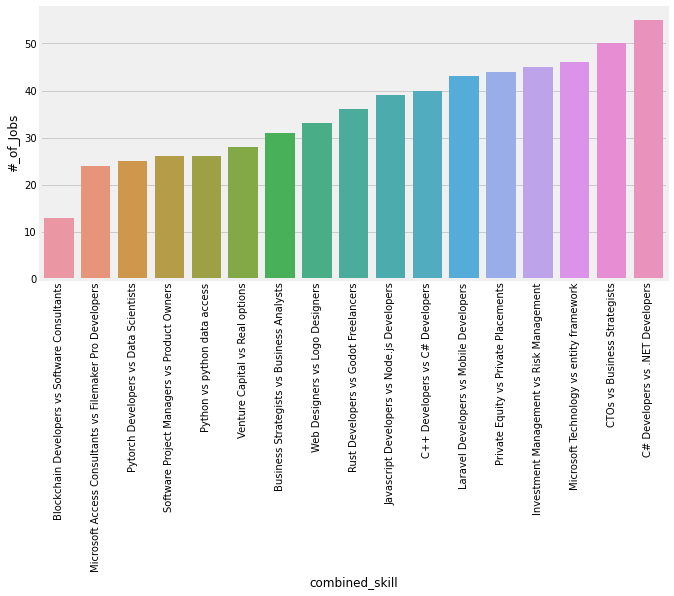

In [219]:
# Bar plot Generation
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_activities.combined_skill, y=top_activities['#_of_Jobs'], data=question1)
plt.xticks(rotation=90);

### 






# COMPETITOR DATASET

In [2]:
comp_dataset = pd.read_csv("comp_data.csv") #importing the dataset

# comp_dataset.head()

comp_dataset.isna().sum() # checking missing values


# selecting out the columns needed for out analysis
comp_dataset.drop(columns=['Toptal.com (pages)','Competitor 1 (pages)','Competitor 2 (pages)','Competitor 3 (pages)',
                          'Competitor 4 (pages)'], axis=1, inplace=True)



# comp_dataset.isna().sum()

# comp_dataset.info()

### Which keywords are the lowest hanging fruits for toptal to go after?
+ Some of this hanging fruits were found to be '$25 credit repair','online translator english to spanish','online translator english to persian' etc for toptal to go after with toptal.com value of 0


In [3]:
# Created table
comp_dataset.groupby('Keyword').min().reset_index().sort_values('Toptal.com', ascending=True)[['Keyword','Toptal.com']].head()

Keyword  Toptal.com
0                             $25 credit repair         0.0
20287      online translator english to spanish         0.0
20286      online translator english to persian         0.0
20285  online translator english to french free         0.0
20284       online translator english to danish         0.0

### Which keywords are the most competitve across 2 or more of the competitors?
+ From the table below '10 3000 wordsdatdrop scripthow to be a cartoon', '10 careers in technical drawingenglish to turk.' seems to be the two most used key words by the competitors, majorly competitor1 and competitor2
+ The table provided shows the top 5 keywords used by this competitors

In [4]:
keywords_competitors=pd.DataFrame(comp_dataset.groupby(by=['Competitor 1','Competitor 2','Competitor 3','Competitor 4'])['Keyword'].sum().sort_values(ascending=True).head())
keywords_competitors

Keyword
Competitor 1 Competitor 2 Competitor 3 Competitor 4                                                   
47.0         37.0         0.0          0.0           10 3000 wordsdatdrop scripthow to be a cartoon...
23.0         95.0         0.0          0.0           10 careers in technical drawingenglish to turk...
32.0         95.0         0.0          0.0                10 of 1500 wordscheck paypal verified status
81.0         6.0          0.0          0.0           100 genuine form filling jobfreelancer redes s...
23.0         49.0         0.0          0.0           100 sure online jobshome based network enginee...

###### To carry on with the analysis which would be more of text analysis, the Keywords Column would have to be Engineered and passed through some preprocessing

In [8]:
keywords = comp_dataset[['Keyword']] # selecting out the keyword column

# keywords
##############################   IMPORTING THE REQUIRED LIBRARIES  #########################
import tweepy
from textblob import TextBlob

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
# importing libraries for visualization
import plotly as py
import cufflinks as cf

from plotly.offline import iplot

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()


from sklearn.feature_extraction.text import CountVectorizer


# my text cleaning function

def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing all @mentions
    text = re.sub(r'#', '', text) # Removing all # symbols
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removing all hyperlinks
    
    return text

keywords['Keyword'] = keywords['Keyword'].apply(text_cleaning)


keywords

all_words = ' '.join(keywords['Keyword'].tolist())  # creating a bag of all keywords

all_words

keywords


### FEATURE ENGINEERING

keywords['review_len'] = keywords['Keyword'].apply(lambda x: len(x)) #calculate the length of each keyword
keywords['word_len'] = keywords['Keyword'].apply(lambda x: len(x.split())) #calculate the number of words in each keyword


#function to calculate the average number of words for keyword
def avg_num_word(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    
    return word_len/(len(words)+0.00001) # we add 0.00001 to prevent 0 divisiblity error

keywords['avg_word_len'] = keywords['Keyword'].apply(lambda x: avg_num_word(x))
# keywords['avg_word_len'] = keywords['Keyword'].apply(lambda x: int(round(x,0))) 

keywords

# keywords.groupby(['Keyword','review_len']).count().sort_values('review_len',ascending=False)

# pip install country_list

# import faker

# Fake = faker()









Keyword  review_len  word_len  \
0                                       freelance jobs          14         2   
1                                      shopify careers          15         2   
2                                    shopify developer          17         2   
3                                          python jobs          11         2   
4                                   shopify developers          18         2   
...                                                ...         ...       ...   
30522                       companies that make flyers          26         4   
30523               companies that work with youtubers          34         5   
30524  companies using r programming language in india          47         7   
30525                       company in arabic language          26         4   
30526                   company logo letterhead design          30         4   

       avg_word_len  
0          6.499968  
1          6.999965  
2          7.999960  
3          4.999975  
4          8.499958  
...             ...  
30522      5.749986  
30523      5.999988  
30524      5.857134  
30525      5.749986  
30526      6.749983  

[30527 rows x 4 columns]

### What was the most common phrase length for queries in the set?
+ The most common phrase length was found to be 24 with a count of 1409
+ Some the keywords were 'wordpress developer jobs', 'freelance developer jobs','digital illustrator jobs' and others
+ The table below displays 20 of this keywords among the 1409 counted

Arriving to this judgment made above was by:
+ **step 1:** 
Carry out a count on all unique values (digits) on the review_len column (which is the length of characters in the phrase). This helps identify the values and how many time such values occured.

+ **step 2:** 
After getting the max to be 24, next was to identify some of this words

*The next cells displays this steps and their outputs*





###### Step 1

In [9]:
keywords.review_len.value_counts()

24    1409
21    1402
22    1398
25    1376
26    1368
      ... 
69       2
67       1
68       1
3        1
73       1
Name: review_len, Length: 66, dtype: int64

###### Step 2

In [10]:
keywords[keywords.review_len==24]

Keyword  review_len  word_len  avg_word_len
23     wordpress developer jobs          24         3      7.333309
27     freelance developer jobs          24         3      7.333309
48     digital illustrator jobs          24         3      7.333309
55     freelancer jobs in india          24         4      5.249987
59     online data analyst jobs          24         4      5.249987
...                         ...         ...       ...           ...
30374  chrome babylon extension          24         3      7.333309
30420  clickbank create account          24         3      7.333309
30477  codeigniter vs wordpress          24         3      7.333309
30497  comic book colorist jobs          24         4      5.249987
30500  commend for commend csgo          24         4      5.249987

[1409 rows x 4 columns]

### Which word pattern seems to be most prevalent from the list?
+ 3 methods where used in deriving this answer, Unigram, Bigram, and Trigram,
    + unigram == One word pattern
    + Bigram == Two word pattern
    + Trigam == Three word pattern
+ Using the Unigram, the most prevalent word was found to be 'jobs'
+ Using the Bigram, the most prevalent word was found to be 'how to'
+ Using the Trigram, the most prevalent word was found to be 'work from home'
+ The trigram is a better usage when considering pattern
+ A graphical plot has been provided in the following cells showing top 20 word patterns for each method identified above

###### Using Unigram

In [11]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

words = get_top_n_words(keywords['Keyword'],20) # taking top 100 words

words_df= pd.DataFrame(words, columns=['Unigram','Frequency'])
words_df

words_df = words_df.set_index('Unigram')
unigram = words_df.iplot(kind= 'bar', title ='Unigram Top 20')

###### Using Bigram

In [12]:
def bigram_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

words = bigram_top_n_words(keywords['Keyword'], 20)
words_df2 = pd.DataFrame(words, columns=['Bigram','Frequency'])
words_df2

words_df2 = words_df2.set_index('Bigram')
words_df2.iplot(kind= 'bar', title ='Bigram Top 20')



###### Using Trigram

In [13]:
def trigram_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

words = trigram_top_n_words(keywords['Keyword'], 20) # taking top 100 words
word_df3 = pd.DataFrame(words, columns=['Trigram','Frequency'])
# word_df3
word_df3.to_csv('Trigam',index=False)

word_df3 = word_df3.set_index('Trigram')

word_df3.iplot(kind= 'bar', title ='Trigram Top 20')

### What were the most common themes you could find in the keyword data?
+ Having a word cloud would easily help identifiy the most common themes for the this keywords
+ In the wordcloud, the bigger the word the higher the number of times that word occured in the keywords
+ Major themes where: 'freelance', 'job','home','work'
+ Secondry major themes were: 'project online','voice','data entry', 'graphic design','virtual assistant','english','freelancer' etc
+ Below is a derivation of the word cloud

######  Word Cloud


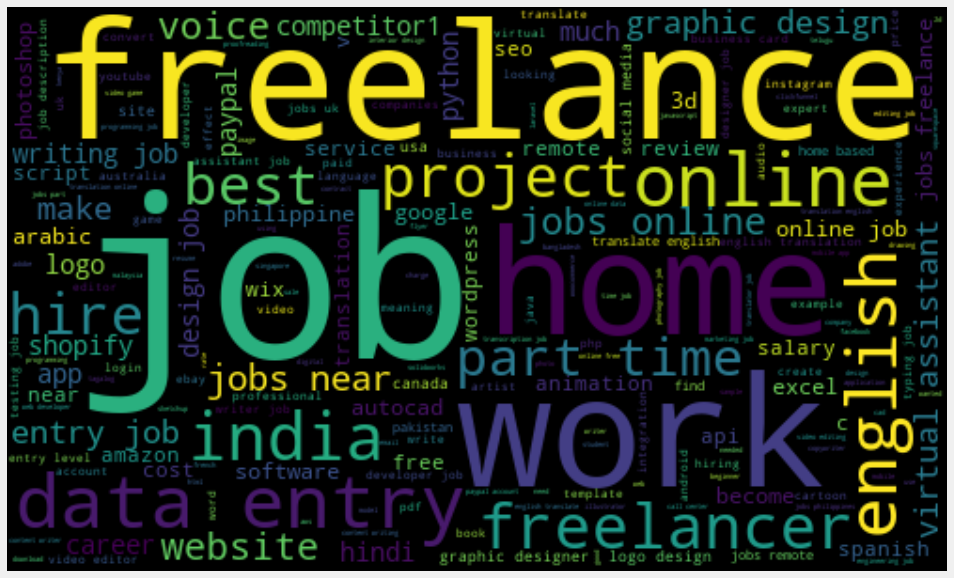

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(15,15))
all_words = ' '.join([twts for twts in keywords['Keyword']])
word_cloud = WordCloud(width=500, height = 300, random_state = 21, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud')

### Are there any localized or geographically based keyword patterns that were represented?
Yes, looking very carefully at the word cloud image one can see words like 'india', 'philppine','canada','pakistan' signifying geographical and location names